In [2]:

#import packages
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [10]:
#load data 
df = pd.read_csv("DiabetesPrediction.csv")

In [11]:
#check data
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


/var/folders/37/9ntfvc_x2nq7277sdc749w_c0000gn/T/ipykernel_32854/3986970258.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[col])
/Users/rodri/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/37/9ntfvc_x2nq7277sdc749w_c0000gn/T/ipykernel_32854/3986970258.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level 

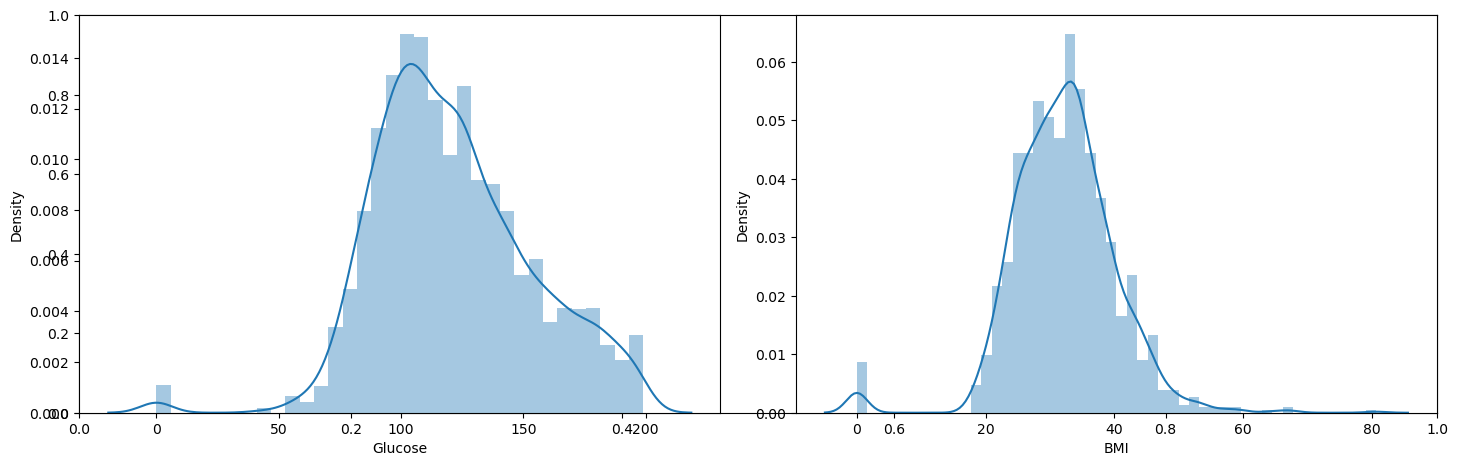

In [13]:
#Check for outliers
plt.subplots(figsize=(15, 5))
for i, col in enumerate(['Glucose', 'BMI']):
    plt.subplot(1, 2, i+1)
    sb.distplot(df[col])
plt.tight_layout()
plt.show()

In [17]:
#Remove outliers (if needed)
df = df[df['Glucose'] < 200]
df = df[df['BMI'] < 50]

/var/folders/37/9ntfvc_x2nq7277sdc749w_c0000gn/T/ipykernel_32854/3986970258.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[col])
/Users/rodri/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/37/9ntfvc_x2nq7277sdc749w_c0000gn/T/ipykernel_32854/3986970258.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level 

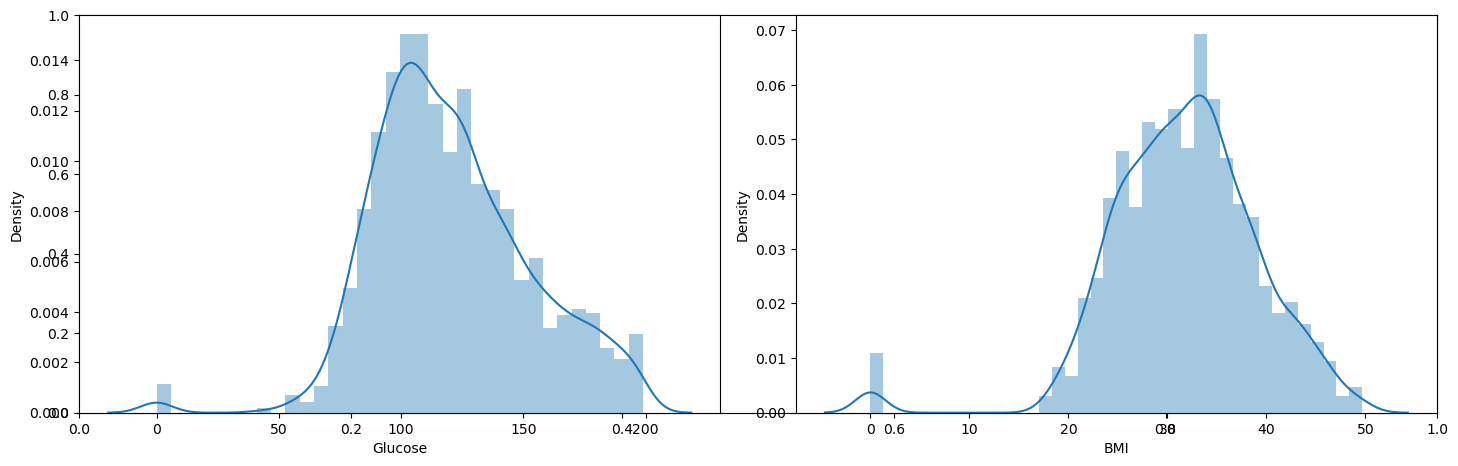

In [18]:
#Check for outliers
plt.subplots(figsize=(15, 5))
for i, col in enumerate(['Glucose', 'BMI']):
    plt.subplot(1, 2, i+1)
    sb.distplot(df[col])
plt.tight_layout()
plt.show()

In [19]:
#Check and remove missing values
df.isna().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [21]:
#Define x and y variables
x = df.drop('Outcome', axis=1)
y = df['Outcome']

In [22]:
#split dataset 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)

In [23]:
#build the model 
knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators = 7,
                             criterion = 'entropy',
                             random_state =7)
svc = SVC()
lc = LogisticRegression()
  

In [24]:
#Obtain the accuracy score on TRAIN data
for clf in (rfc, knn, svc,lc):
    clf.fit(x_train, y_train)
    Y_pred = clf.predict(x_train)
    print("Accuracy score of ",
          clf.__class__.__name__,
          "=",100*metrics.accuracy_score(y_train, 
                                         Y_pred))


Accuracy score of  RandomForestClassifier = 99.90825688073394
Accuracy score of  KNeighborsClassifier = 81.65137614678899
Accuracy score of  SVC = 65.87155963302752
Accuracy score of  LogisticRegression = 70.18348623853211


/Users/rodri/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
#Prediction on the test set and obtain the accuracy score on TEST data 
for clf in (rfc, knn, svc,lc):
    clf.fit(x_train, y_train)
    Y_pred = clf.predict(x_test)
    print("Accuracy score of ",
          clf.__class__.__name__,"=",
          100*metrics.accuracy_score(y_test,
                                     Y_pred))

Accuracy score of  RandomForestClassifier = 98.71794871794873
Accuracy score of  KNeighborsClassifier = 69.96336996336996
Accuracy score of  SVC = 67.03296703296702
Accuracy score of  LogisticRegression = 71.97802197802197


/Users/rodri/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
